---
title: "Gource - Visualisating Code Contributions"
description: "Turn your git log into a fancy video"
date: 2020-07-17
categories: [tutorial]
tags: [plotting]
aliases: ["/gource"]
math: true
draft: true
---

What is Gource? Gource is a way of visualising your git log, showing users and their contributions creating, modifying and deleting files. When run on my repository that was published under the name "Steve" (a Hierarchical Bayesian model for supernova cosmology") and then piped through `ffmpeg`, this is what we get:


In [1]:
from IPython.display import Video

Video("gource.mp4")


# Using gource

Its super easy, head to [the gource website here and download the version for your operating system](https://gource.io/).

Install it, and navigate to your git repository. Then, you can run gource in your terminal or the command prompt. Here is what I ran:

```
gource -screen 1 -1280x720 --seconds-per-day 0.05 --font-size 24 --start-position 0.05 --stop-position 0.99 --title "Steve: Bayesian Hierarchical Model for Supernova Cosmology" --hide mouse,progress,filenames,dirnames --date-format "%d-%B-%y" --max-file-lag 0.3 --background 111111 -o gource.ppm
```

Let's break it down:

- `-screen 1` - display it on my primary monitor
- `-1280x720` - the output resolution
- `--seconds-per-day 0.05` - 20 days in a single second please
- `--font-size 24` - Big font so you can read it without glasses
- `--start-position 0.05` - Trim first 5% of git log
- `--stop-position 0.99` - Trim last 1% of git log
- `--title "Steve: Bayesian Hierarchical Model for Supernova Cosmology"` - self-explanatory
- `--hide mouse,progress,filenames,dirnames` - hide a bunch of things for clearer output
- `--date-format "%d-%B-%y"` - Stop confusing with the silly American date format by using names
- `--max-file-lag 0.3` - Dont wait too long to display files, pop them up quickly.
- `--background 111111` - Hex colour of the background
- `-o gource.ppm` - output file. Will be large.

This will now output a `gource.ppm` file.. which will be massive. For me in this small repository, it was 8GB. So time to let `ffmpeg` do its magic and shrink this back down.

```
ffmpeg -y -r 60 -f image2pipe -vcodec ppm -i gource.ppm -vcodec libx264 -preset slower -pix_fmt yuv420p -crf 23 -bf 0 gource.mp4
```

Which will generate an `mp4` file at 60FPS using the old trusty `H264` encoding.

And at the end, we can hopefully get our our flower / daffodil like graph. I don't use gource often, but it can be an interesting way to show the growth of a project with multiple collaborators.


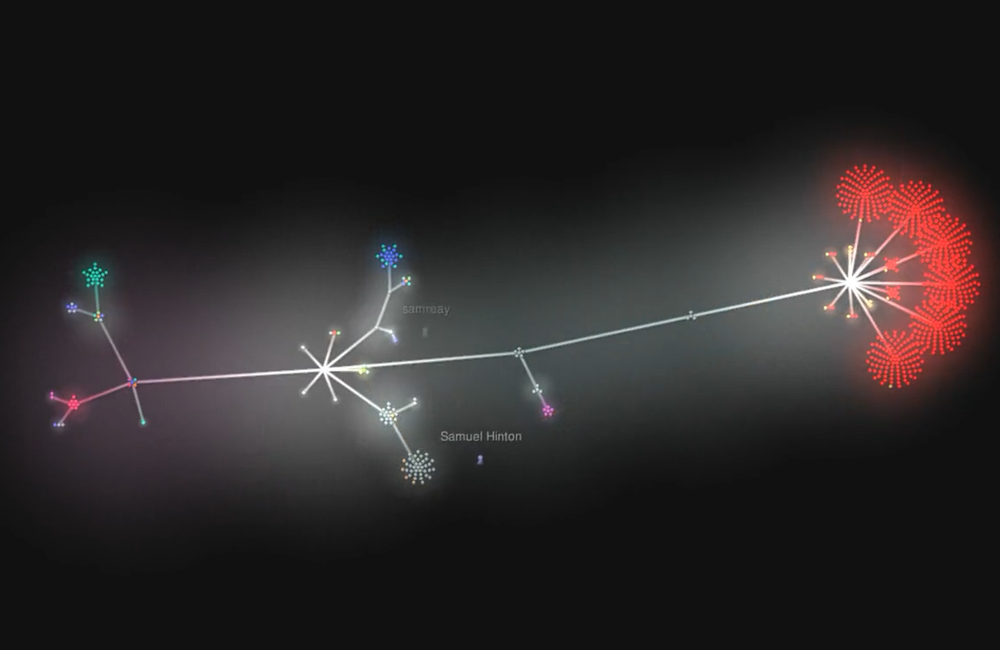

In [2]:
from IPython.display import Image

Image("gource/cover.png")


!!! img-main nofinalcode
